## 1. ZOMBIES!
<p>News reports suggest that the impossible has become possible...zombies have appeared on the streets of the US! What should we do? The Centers for Disease Control and Prevention (CDC) <a href="https://www.cdc.gov/cpr/zombie/index.htm">zombie preparedness website</a> recommends storing water, food, medication, tools, sanitation items, clothing, essential documents, and first aid supplies. Thankfully, we are CDC analysts and are prepared, but it may be too late for others! </p>
<p>Our team decides to identify supplies that protect people and coordinate supply distribution. A few brave data collectors volunteer to check on 200 randomly selected adults who were alive before the zombies. We have recent data for the 200 on age and sex, how many are in their household, and their rural, suburban, or urban location. Our heroic volunteers visit each home and record zombie status and preparedness. Now it's our job to figure out which supplies are associated with safety!</p>
<p><br>
<center>
    <img src="https://assets.datacamp.com/production/project_668/img/zombie-wide.jpg" width="700px">
</center><br></p>

In [2]:
# Read in the data
zombies <- read.csv("datasets/zombies.csv")

# Examine the data with summary()
summary(zombies)

# Create water-per-person
zombies$water.person <- zombies$water / zombies$household

# Examine the new variable 
summary(zombies$water.person)

    zombieid         zombie         age            sex          rurality 
 Min.   :  1.00   Human :121   Min.   :18.00   Female: 99   Rural   :98  
 1st Qu.: 50.75   Zombie: 79   1st Qu.:29.00   Male  :101   Suburban:48  
 Median :100.50                Median :42.00                Urban   :54  
 Mean   :100.50                Mean   :44.41                             
 3rd Qu.:150.25                3rd Qu.:58.00                             
 Max.   :200.00                Max.   :85.00                             
   household        water            food             medication 
 Min.   :1.00   Min.   : 0.00   Food   :110   Medication   : 94  
 1st Qu.:2.00   1st Qu.: 0.00   No food: 90   No medication:106  
 Median :2.50   Median : 8.00                                    
 Mean   :2.68   Mean   : 8.75                                    
 3rd Qu.:4.00   3rd Qu.: 8.00                                    
 Max.   :6.00   Max.   :40.00                                    
      tools         

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   3.092   5.333  13.333 

## 2. Compare zombies and humans
<p>Because every moment counts when dealing with life and (un)death, we want to get this right! The first task is to compare humans and zombies to identify differences in supplies. We review the data and find the following: </p>
<ul>
<li>zombieid: unique identifier </li>
<li>zombie: human or zombie</li>
<li>age: age in years </li>
<li>sex: male or female </li>
<li>rurality: rural, suburban, or urban </li>
<li>household: number of people living in household </li>
<li>water: gallons of clean water available </li>
<li>food: food or no food </li>
<li>medication: medication or no medication </li>
<li>tools: tools or no tools </li>
<li>firstaid: first aid or no first aid </li>
<li>sanitation: sanitation or no sanitation </li>
<li>clothing: clothing or no clothing</li>
<li>documents: documents or no documents </li>
</ul>

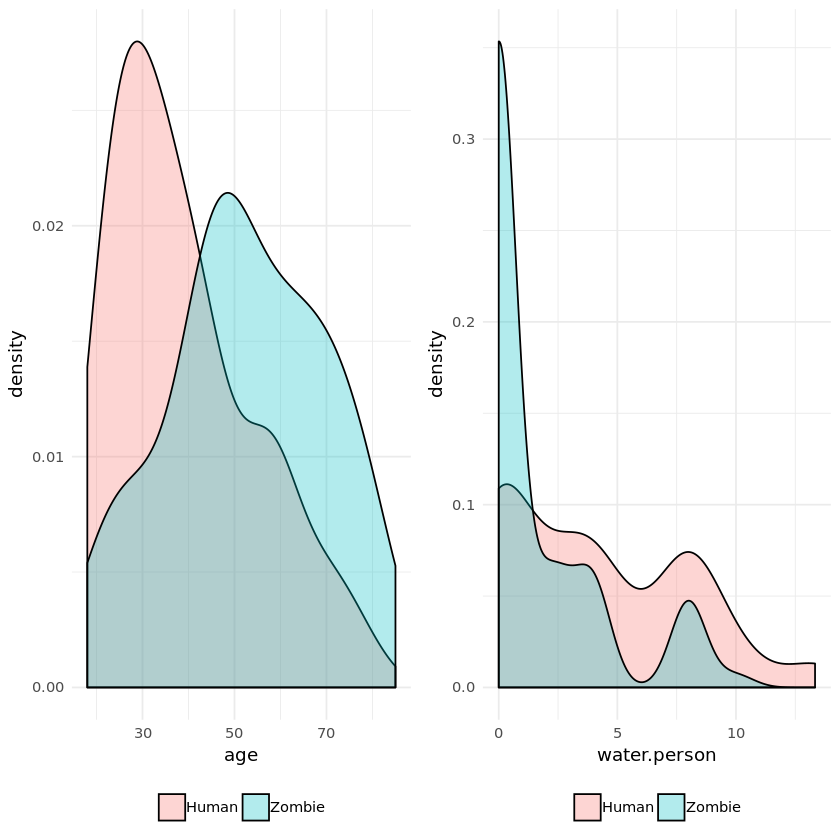

In [4]:
# Load ggplot2 and gridExtra
library(ggplot2) 
library(gridExtra)

# Create the ageZombies graph
ageZombies <- ggplot(data = zombies, aes(x = age, fill = zombie)) +
  geom_density(alpha = 0.3) +  
  theme_minimal() +
  theme(legend.position = "bottom", legend.title = element_blank())

# Create the waterPersonZom graph
waterPersonZom <- ggplot(data = zombies, aes(x = water.person, fill = zombie)) +
  geom_density(alpha = 0.3) +  
  theme_minimal() +
  theme(legend.position = "bottom", legend.title = element_blank())

# Display plots side by side
grid.arrange(ageZombies, waterPersonZom, ncol = 2)

## 3. Compare zombies and humans (part 2)
<p>It looks like those who turned into zombies were older and had less available clean water. This suggests that getting water to the remaining humans might help protect them from the zombie hoards! Protecting older citizens is important, so we need to think about the best ways to reach this group. What are the other characteristics and supplies that differ between humans and zombies? Do zombies live in urban areas? Or are they more common in rural areas? Is water critical to staying human? Is food critical to staying human?</p>
<p><br>
<center>
    <img src="https://assets.datacamp.com/production/project_668/img/hands-wide.jpg" width="700px">
</center><br></p>

In [6]:
# Make a subset of the zombies data with only factors
zombies.factors <- zombies[ , sapply(zombies, is.factor)]

# Write a function to get percent zombies
perc.zombies <- lapply(zombies.factors, 
                       function(x){ 
                           return(prop.table(table(x, zombies$zombie),
                                             margin = 1))
                           })
# Print the data
perc.zombies

$zombie
        
x        Human Zombie
  Human      1      0
  Zombie     0      1

$sex
        
x            Human    Zombie
  Female 0.6262626 0.3737374
  Male   0.5841584 0.4158416

$rurality
          
x              Human    Zombie
  Rural    0.8163265 0.1836735
  Suburban 0.5208333 0.4791667
  Urban    0.2962963 0.7037037

$food
         
x             Human    Zombie
  Food    0.8272727 0.1727273
  No food 0.3333333 0.6666667

$medication
               
x                   Human    Zombie
  Medication    0.8297872 0.1702128
  No medication 0.4056604 0.5943396

$tools
          
x              Human    Zombie
  No tools 0.6039604 0.3960396
  tools    0.6060606 0.3939394

$firstaid
                       
x                           Human    Zombie
  First aid supplies    0.6320755 0.3679245
  No first aid supplies 0.5744681 0.4255319

$sanitation
               
x                   Human    Zombie
  No sanitation 0.4705882 0.5294118
  Sanitation    0.7448980 0.2551020

$clothin

## 4. Recode variables missing values
<p>Hmm...it seems a little fishy that the <code>clothing</code> and <code>documents</code> variables have only one category in <code>prop.table()</code>. After checking with the data collectors, they told you that they recorded those without clothing or documents as missing values or <code>NA</code> rather than <code>No clothing</code> or <code>No documents</code>. </p>
<p>To make sure the analyses are consistent and useful, the analysis team leader decides we should recode the <code>NA</code> values to <code>No clothing</code> and <code>No documents</code> for these two variables. </p>

In [8]:
# Add new level and recode NA to "No clothing"
levels(zombies$clothing) <- c(levels(zombies$clothing), "No clothing")
zombies$clothing[is.na(zombies$clothing)] <- "No clothing"

# Add new level and recode NA to "No documents"
levels(zombies$documents) <- c(levels(zombies$documents), "No documents")
zombies$documents[is.na(zombies$documents)] <- "No documents"

# Check recoding
summary(zombies)

    zombieid         zombie         age            sex          rurality 
 Min.   :  1.00   Human :121   Min.   :18.00   Female: 99   Rural   :98  
 1st Qu.: 50.75   Zombie: 79   1st Qu.:29.00   Male  :101   Suburban:48  
 Median :100.50                Median :42.00                Urban   :54  
 Mean   :100.50                Mean   :44.41                             
 3rd Qu.:150.25                3rd Qu.:58.00                             
 Max.   :200.00                Max.   :85.00                             
   household        water            food             medication 
 Min.   :1.00   Min.   : 0.00   Food   :110   Medication   : 94  
 1st Qu.:2.00   1st Qu.: 0.00   No food: 90   No medication:106  
 Median :2.50   Median : 8.00                                    
 Mean   :2.68   Mean   : 8.75                                    
 3rd Qu.:4.00   3rd Qu.: 8.00                                    
 Max.   :6.00   Max.   :40.00                                    
      tools         

## 5. Selecting variables to predict zombie status
<p>From Task 3, it appears that 70.4% of people in urban areas are zombies, while just 18.4% of those in rural areas are zombies. Getting humans out of cities and protecting those who cannot leave seems important!  </p>
<p>For most of the supplies, there is less of a difference between humans and zombies, so it is difficult to decide what else to do. Since there is just one chance to get it right and every minute counts, the analysis team decides to conduct bivariate statistical tests to gain a better understanding of which differences in percents are statistically significantly associated with being a human or a zombie. </p>

In [10]:
# Update subset of factors
zombies.factors <- zombies[ , sapply(zombies, is.factor)]

# Chi-squared for factors
chi.zombies <- lapply(zombies.factors, 
                       function(x){
                           return(chisq.test(x, zombies.factors$zombie))
                           })

# T-tests for numeric
ttest.age <- t.test(zombies$age ~ zombies$zombie)
ttest.water <- t.test(zombies$water.person ~ zombies$zombie)    

# Examine the results
chi.zombies 
ttest.age 
ttest.water

$zombie

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 195.84, df = 1, p-value < 2.2e-16


$sex

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 0.21561, df = 1, p-value = 0.6424


$rurality

	Pearson's Chi-squared test

data:  x and zombies.factors$zombie
X-squared = 41.271, df = 2, p-value = 1.092e-09


$food

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 48.49, df = 1, p-value = 3.32e-12


$medication

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 35.747, df = 1, p-value = 2.247e-09


$tools

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zombie
X-squared = 0, df = 1, p-value = 1


$firstaid

	Pearson's Chi-squared test with Yates' continuity correction

data:  x and zombies.factors$zo


	Welch Two Sample t-test

data:  zombies$age by zombies$zombie
t = -5.6247, df = 155.02, p-value = 8.453e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -18.099289  -8.690751
sample estimates:
 mean in group Human mean in group Zombie 
            39.12397             52.51899 



	Welch Two Sample t-test

data:  zombies$water.person by zombies$zombie
t = 5.5436, df = 197.43, p-value = 9.415e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.636281 3.443253
sample estimates:
 mean in group Human mean in group Zombie 
            4.095041             1.555274 


## 6. Build the model
<p>Now we are getting somewhere! Rurality, food, medication, sanitation, age, and water per person have statistically significant relationships to zombie status. We use this information to coordinate the delivery of food and medication while we continue to examine the data!  </p>
<p>The next step is to estimate a logistic regression model with <code>zombie</code> as the outcome. The generalized linear model command, <code>glm()</code>, can be used to determine whether and how each variable, and the set of variables together, contribute to predicting zombie status. Following <code>glm()</code>, <code>odds.n.ends()</code> computes model significance, fit, and odds ratios.</p>

In [12]:
# Create zombie model
zombie.model <- glm(zombie ~ age + water.person + food + rurality + medication  + sanitation,
                   data = zombies, family = binomial(logit))

# Model significance, fit, and odds ratios with 95% CI
library(odds.n.ends)
zombie.model.fit <- odds.n.ends(zombie.model)

# Print the results of the odds.n.ends command
zombie.model.fit

Waiting for profiling to be done...


,1,0,Sum
1,0.315,0.060,0.375
0,0.080,0.545,0.625
Sum,0.395,0.605,1.000
,1,0,Sum
1,63,12,75
0,16,109,125
Sum,79,121,200
,OR,2.5 %,97.5 %
(Intercept),0.00224594,0.0002093871,0.01622961
age,1.08005714,1.0485596858,1.11810998


## 7. Checking model assumptions
<p>The model is statistically significant (<font face="Symbol">c</font><sup>2</sup> = 145.6; p &lt; 0.05), indicating that the variables in the model work together to help explain zombie status. Older age, having no food, living in suburban or urban areas (compared to rural), and having no access to medication increased the odds of being a zombie. Access to sanitation and having enough water decreased the odds of being a zombie. The model correctly predicted the zombie status of 63 zombies and 109 humans, or 172 of the 200 participants. Before relying on the model, check model assumptions: no multicollinearity and linearity.</p>
<p>Checking multicollinearity:<br>
We can use the generalized variance inflation factor (GVIF) to check for multicollinearity. The GVIF determines to what extent each independent variable can be explained by the rest of the independent variables. When an independent variable is well-explained by the other independent variables, the GVIF is high, indicating that the variable is redundant and should be dropped from the model. Values greater than two are often used to indicate a failed multicollinearity assumption.</p>
<p><br>
<center>
GVIF<sup>(1/(2df))</sup> < 2
<br>
df = degrees of freedom
</center>
<br></p>
<p>Checking linearity:<br>
Linearity can be checked by graphing the log-odds of the outcome against each numeric predictor to see if the relationship is linear.</p>
<p><br>
<center>
    <img src="https://assets.datacamp.com/production/project_668/img/test-assumptions-zombie.jpg" width="400px">
</center><br></p>

Loading required package: carData


,GVIF,Df,GVIF^(1/(2*Df))
age,1.508748,1,1.228311
water.person,1.188868,1,1.090352
food,1.304250,1,1.142038
rurality,1.313980,2,1.070649
medication,1.271348,1,1.127541
sanitation,1.102351,1,1.049929


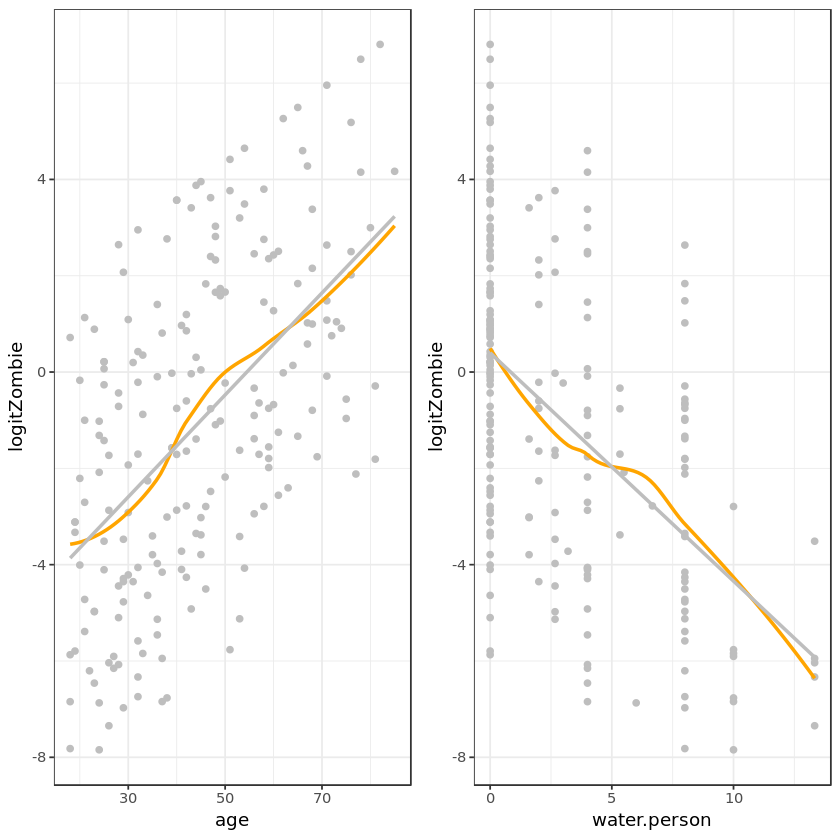

In [14]:
# Compute GVIF 
library(car)
vif(zombie.model)

# Make a variable of the logit of the outcome
zombies$logitZombie <- log(zombie.model$fitted.values/(1-zombie.model$fitted.values))

# Graph the logit variable against age and water.person
ageLinearity <- ggplot(data = zombies, aes(x = age, y = logitZombie))+
  geom_point(color = "gray") +
  geom_smooth(method = "loess", se = FALSE, color = "orange") + 
  geom_smooth(method = "lm", se = FALSE, color = "gray") + 
  theme_bw() 

waterPersonLin <- ggplot(data = zombies, aes(x = water.person, y = logitZombie))+
  geom_point(color = "gray") +
  geom_smooth(method = "loess", se = FALSE, color = "orange") + 
  geom_smooth(method = "lm", se = FALSE, color = "gray") + 
  theme_bw() 

# View both plots side-by-side
grid.arrange(ageLinearity, waterPersonLin, ncol = 2)

## 8. Interpreting assumptions and making predictions
<p>We find that the GVIF scores are low, indicating the model meets the assumption of no perfect multicollinearity. The plots show relatively minor deviation from the linearity assumption for <code>age</code> and <code>water.person</code>. The assumptions appear to be sufficiently met. </p>
<p>One of your friends on the analysis team hasn't been able to reach her dad or brother for hours, but she knows that they have food, medicine, and sanitation from an earlier phone conversation. Her 71-year-old dad lives alone in a suburban area and is excellent at preparedness; he has about five gallons of water. Her 40-year-old brother lives in an urban area and estimated three gallons of water per person. She decides to use the model to compute the probability they are zombies.</p>

In [16]:
# Make a new data frame with the relatives data in it 
newdata <- data.frame(age = c(71, 40), 
                      water.person = c(5, 3),
                      food = c("Food", "Food"),
                      rurality = c("Suburban", "Urban"),
                      medication = c("Medication", "Medication"),
                      sanitation = c("Sanitation", "Sanitation"))

# Use the new data frame to predict 
predictions <- predict(zombie.model, newdata, type = "response")

# Print the predicted probabilities
predictions

1          2 
0.15457694 0.09720797

## 9. What is your zombie probability?
<p>Her dad has about a 15.5 percent chance of being a zombie and her brother has less than a 10 percent chance. It looks like they are probably safe, which is a big relief! She comes back to the team to start working on a plan to distribute food and common types of medication to keep others safe. The team discusses what it would take to start evacuating urban areas to get people to rural parts of the country where there is a lower percent of zombies. While the team is working on these plans, one thought keeps distracting you...your family may be safe, <b>but how safe are you?</b></p>
<p>Add your own real-life data to the <code>newdata</code> data frame and predict your own probability of becoming a zombie!</p>

In [18]:
# Add your data to the newdata data frame
newdata <- data.frame(age = c(71, 40, 25), 
                      water.person = c(5, 3, 5),
                      food = c("Food", "Food", "Food"),
                      rurality = c("Suburban", "Urban", "Urban"),
                      medication = c("Medication", "Medication", "Medication"),
                      sanitation = c("Sanitation", "Sanitation", "Sanitation"))

# Use the new data frame to predict 
predictions <- predict(zombie.model, newdata, type = "response")

# Print the predictions
predictions

1          2          3 
0.15457694 0.09720797 0.02040983

## 10. Are you ready for the zombie apocalypse?
<p>While it is unlikely to be a zombie apocalypse will happen in the near future, the information presented in this notebook draws on emergency preparedness recommendations from the CDC. Although there is no way to make ourselves younger, we can have food, water, medication, and other supplies ready to ensure we are safe in the event of a blizzard, flood, tornado, or another emergency. After computing your zombie probability, think about what you could personally do to increase the likelihood that you will stay safe in the next storm or zombie apocalypse.</p>
<p><br>
<center>
    <img src="https://assets.datacamp.com/production/project_668/img/zombie-wide.jpg" width="700px">
</center><br></p>

In [20]:
# What is your probability of becoming a zombie?
me <- 0.0204098254276809

# How prepared are you for a real emergency?
preparedness_level  <- "I got this!"